# Car Price Prediction 

In [1]:
#Topic = Airlince Prediction (ML) 
#Project by-Mr. Raj Patil
#Guided by Mr. Sameer Warsolkar Sir.

# Aim of the Project

The aim of this project is to develop a machine learning model that predicts car prices using key features such as brand, model year, mileage, fuel type, engine power, and transmission. The goal is to provide accurate price estimates to help buyers and sellers make informed decisions.

# Abstract

The dataset includes important details like car brand, mileage, engine specifications, fuel type, and market price. The objective is to analyze the factors affecting car prices and build regression models that can predict the selling price of a car based on its characteristics.

# Description

The dataset contains essential information about various used cars, including their specifications and selling prices. It enables the study of how different features influence car value. Through data preprocessing, EDA, and machine learning techniques, the project develops a model capable of estimating car prices accurately, making it useful for buyers, sellers, and automobile analysts.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns  # Import Libraries:
import matplotlib.pyplot as plt  # 2d graphics in python

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("car_price_dataset.csv")
df.head() #Display the first few rows

,car_id,brand,model_year,engine_size,mileage,fuel_type,transmission,owner_count,seating_capacity,horsepower,car_age,price
0,1,Audi,2006,3.61,24499,Petrol,Automatic,3,7,169,19,1.364230e+06
1,2,Ford,2019,2.88,6307,Diesel,Automatic,3,5,332,6,1.668881e+06
2,3,Hyundai,2014,1.57,80922,Diesel,Manual,1,4,228,11,5.815559e+05
3,4,Kia,2010,3.03,26943,Diesel,Automatic,1,6,338,15,1.499801e+06
4,5,Ford,2007,4.63,82203,Electric,Automatic,2,6,347,18,2.086592e+06


In [4]:
df.shape #show the total count of columns and rows 

(20000, 12)

In [5]:
df.columns #show the the all columns name 

Index(['car_id', 'brand', 'model_year', 'engine_size', 'mileage', 'fuel_type',
       'transmission', 'owner_count', 'seating_capacity', 'horsepower',
       'car_age', 'price'],
      dtype='object')

In [6]:
df.info() #it show the information about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_id            20000 non-null  int64  
 1   brand             20000 non-null  object 
 2   model_year        20000 non-null  int64  
 3   engine_size       20000 non-null  float64
 4   mileage           20000 non-null  int64  
 5   fuel_type         20000 non-null  object 
 6   transmission      20000 non-null  object 
 7   owner_count       20000 non-null  int64  
 8   seating_capacity  20000 non-null  int64  
 9   horsepower        20000 non-null  int64  
 10  car_age           20000 non-null  int64  
 11  price             20000 non-null  float64
dtypes: float64(2), int64(7), object(3)
memory usage: 1.8+ MB


In [7]:
df.isnull().sum()  #Display basic information about the datase

car_id              0
brand               0
model_year          0
engine_size         0
mileage             0
fuel_type           0
transmission        0
owner_count         0
seating_capacity    0
horsepower          0
car_age             0
price               0
dtype: int64

In [8]:
df.duplicated().sum() ## Check for duplicates

np.int64(0)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_id,20000.0,1.000050e+04,5773.647028,1.0,5000.750000,1.000050e+04,1.500025e+04,2.000000e+04
model_year,20000.0,2.012128e+03,7.211897,2000.0,2006.000000,2.012000e+03,2.018000e+03,2.024000e+03
engine_size,20000.0,2.991542e+00,1.151049,1.0,2.000000,2.990000e+00,3.980000e+00,5.000000e+00
mileage,20000.0,1.022666e+05,56138.723699,5005.0,53840.500000,1.022340e+05,1.504272e+05,1.999970e+05
owner_count,20000.0,2.002050e+00,0.817178,1.0,1.000000,2.000000e+00,3.000000e+00,3.000000e+00
seating_capacity,20000.0,5.488150e+00,1.118804,4.0,4.000000,5.000000e+00,6.000000e+00,7.000000e+00
horsepower,20000.0,2.349560e+02,95.402309,70.0,152.000000,2.340000e+02,3.180000e+02,3.990000e+02
car_age,20000.0,1.287235e+01,7.211897,1.0,7.000000,1.300000e+01,1.900000e+01,2.500000e+01
price,20000.0,1.221070e+06,636755.493929,50000.0,720950.565833,1.215307e+06,1.715097e+06,2.871836e+06


# Data Visualization 

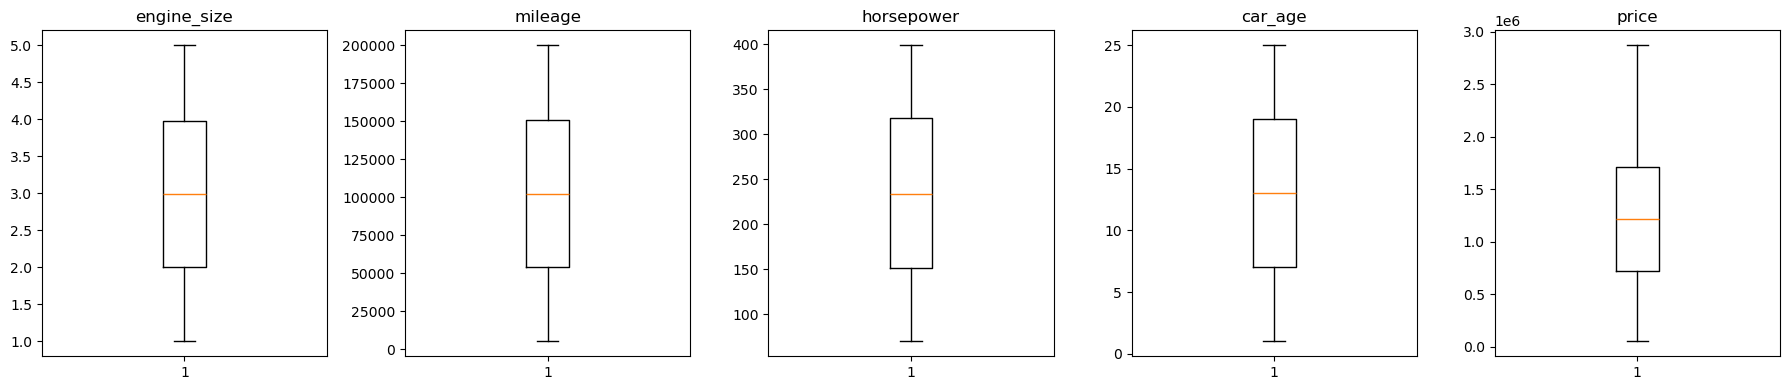

In [5]:
numeric_cols = ["engine_size", "mileage", "horsepower", "car_age", "price"]

plt.figure(figsize=(18,4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


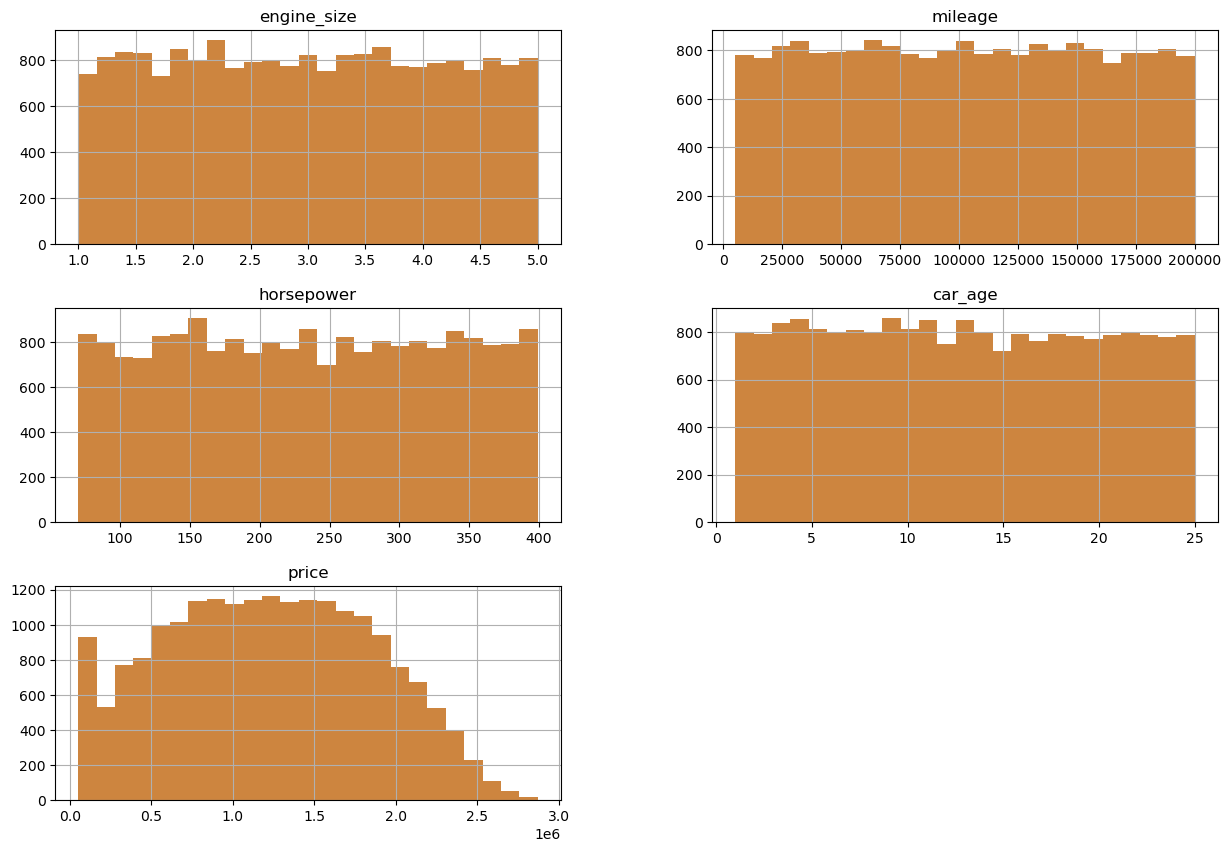

In [6]:
numeric_cols = ["engine_size", "mileage", "horsepower", "car_age", "price"]
df[numeric_cols].hist(bins=25, figsize=(15,10), color='peru')
plt.show()

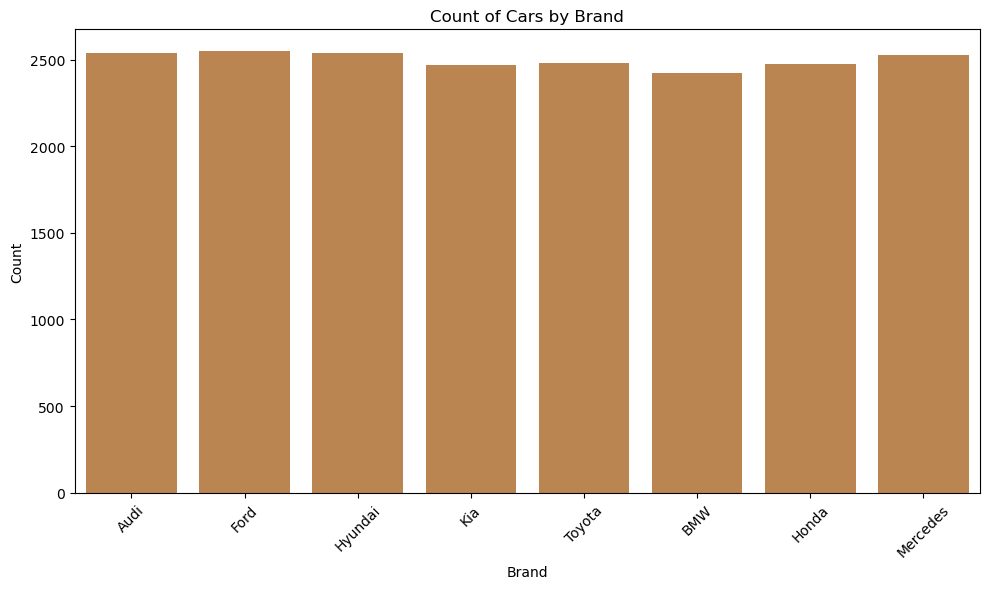

In [7]:
# Countplot for brand distribution
plt.figure(figsize=(10,6))
sns.countplot(x="brand", data=df,color='peru')
plt.xticks(rotation=45)
plt.title("Count of Cars by Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<Axes: xlabel='seating_capacity', ylabel='count'>

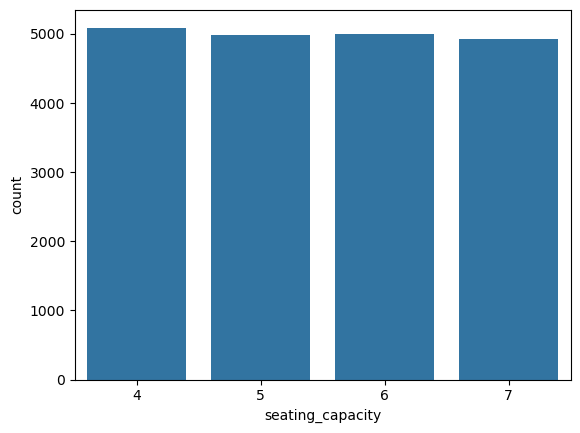

In [13]:
sns.countplot(data=df, x='seating_capacity')

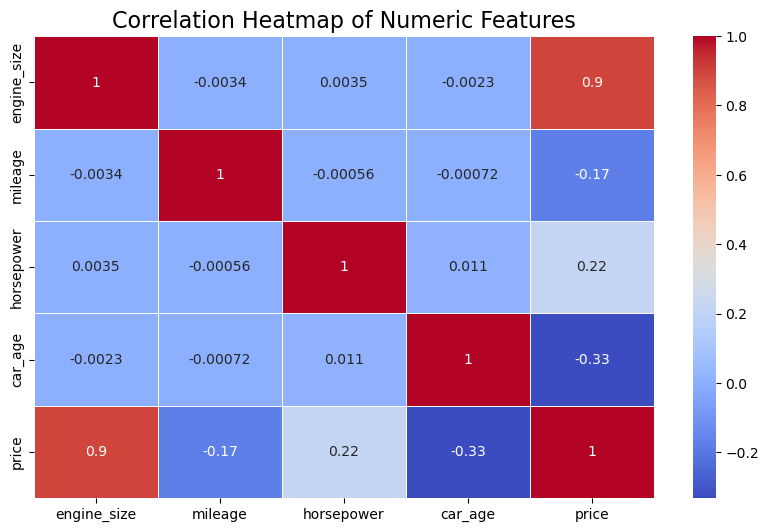

In [14]:
numeric_cols = ["engine_size", "mileage", "horsepower", "car_age", "price"]

corr = df[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

In [8]:
categorical_cols = ["brand", "fuel_type", "transmission"]
for col in categorical_cols:
    print("Column:", col)
    print(df[col].value_counts())
    print("-"*40)

Column: brand
brand
Ford        2547
Audi        2536
Hyundai     2536
Mercedes    2528
Toyota      2481
Honda       2477
Kia         2471
BMW         2424
Name: count, dtype: int64
----------------------------------------
Column: fuel_type
fuel_type
Diesel      5041
Petrol      4997
Hybrid      4990
Electric    4972
Name: count, dtype: int64
----------------------------------------
Column: transmission
transmission
Manual       10140
Automatic     9860
Name: count, dtype: int64
----------------------------------------


In [9]:
corr = df[numeric_cols].corr()
corr

,engine_size,mileage,horsepower,car_age,price
engine_size,1.000000,-0.003373,0.003452,-0.002333,0.897462
mileage,-0.003373,1.000000,-0.000559,-0.000724,-0.174428
horsepower,0.003452,-0.000559,1.000000,0.010518,0.218793
car_age,-0.002333,-0.000724,0.010518,1.000000,-0.332221
price,0.897462,-0.174428,0.218793,-0.332221,1.000000


## Label Encoder converting categorical data into numeric form

In [11]:
from sklearn.preprocessing import LabelEncoder

# Copy dataframe to avoid overwriting
df_le = df.copy()

# Columns to encode
cat_cols = ["brand", "fuel_type", "transmission"]

# Apply label encoding
le = LabelEncoder()

for col in cat_cols:
    df_le[col] = le.fit_transform(df_le[col])

# Check updated data
df_le.head()


,car_id,brand,model_year,engine_size,mileage,fuel_type,transmission,owner_count,seating_capacity,horsepower,car_age,price
0,1,0,2006,3.61,24499,3,0,3,7,169,19,1.364230e+06
1,2,2,2019,2.88,6307,0,0,3,5,332,6,1.668881e+06
2,3,4,2014,1.57,80922,0,1,1,4,228,11,5.815559e+05
3,4,5,2010,3.03,26943,0,0,1,6,338,15,1.499801e+06
4,5,2,2007,4.63,82203,1,0,2,6,347,18,2.086592e+06


In [14]:
df[numeric_cols]

,engine_size,mileage,horsepower,car_age
0,3.61,24499,169,19
1,2.88,6307,332,6
2,1.57,80922,228,11
3,3.03,26943,338,15
4,4.63,82203,347,18
...,...,...,...,...
19995,2.64,185246,357,3
19996,3.29,164876,388,22
19997,1.81,176622,231,9
19998,2.57,39397,368,21


In [13]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ["engine_size", "mileage", "horsepower", "car_age"]

scaler = StandardScaler()
Num_scaled = scaler.fit_transform(df_le[numeric_cols])
df_num=pd.DataFrame(Num_scaled,columns=["engine_size", "mileage", "horsepower", "car_age"])
df_num

,engine_size,mileage,horsepower,car_age
0,0.537313,-1.385311,-0.691363,0.849680
1,-0.096907,-1.709373,1.017234,-0.952942
2,-1.235028,-0.380222,-0.072914,-0.259626
3,0.033412,-1.341775,1.080127,0.295027
4,1.423483,-0.357403,1.174466,0.711017
...,...,...,...,...
19995,-0.305418,1.478150,1.279288,-1.368932
19996,0.259299,1.115290,1.604236,1.265670
19997,-1.026517,1.324526,-0.041468,-0.536953
19998,-0.366233,-1.119926,1.394592,1.127006


In [15]:
df_Final = pd.concat((df_le,df_num),axis=1)
df_Final

,car_id,brand,model_year,engine_size,mileage,fuel_type,transmission,owner_count,seating_capacity,horsepower,car_age,price,engine_size,mileage,horsepower,car_age
0,1,0,2006,3.61,24499,3,0,3,7,169,19,1.364230e+06,0.537313,-1.385311,-0.691363,0.849680
1,2,2,2019,2.88,6307,0,0,3,5,332,6,1.668881e+06,-0.096907,-1.709373,1.017234,-0.952942
2,3,4,2014,1.57,80922,0,1,1,4,228,11,5.815559e+05,-1.235028,-0.380222,-0.072914,-0.259626
3,4,5,2010,3.03,26943,0,0,1,6,338,15,1.499801e+06,0.033412,-1.341775,1.080127,0.295027
4,5,2,2007,4.63,82203,1,0,2,6,347,18,2.086592e+06,1.423483,-0.357403,1.174466,0.711017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,2022,2.64,185246,3,0,3,6,357,3,1.326134e+06,-0.305418,1.478150,1.279288,-1.368932
19996,19997,6,2003,3.29,164876,3,0,2,5,388,22,1.237035e+06,0.259299,1.115290,1.604236,1.265670
19997,19998,4,2016,1.81,176622,1,0,2,5,231,9,6.498326e+05,-1.026517,1.324526,-0.041468,-0.536953
19998,19999,4,2004,2.57,39397,1,1,2,6,368,21,1.076491e+06,-0.366233,-1.119926,1.394592,1.127006


In [18]:
X = df_Final.drop("price", axis=1)
y = df_Final["price"]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (16000, 15)
X_test : (4000, 15)
y_train: (16000,)
y_test : (4000,)


## # Linear Regression 

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("🔹 Linear Regression Results:")
print("R² Score :", lr_r2)
print("MAE      :", lr_mae)
print("RMSE     :", lr_rmse)


🔹 Linear Regression Results:
R² Score : 0.9920162760829562
MAE      : 42615.89311502035
RMSE     : 57005.044178528005


## # RandomForestRegressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\n🔹 Random Forest Results:")
print("R² Score :", rf_r2)
print("MAE      :", rf_mae)
print("RMSE     :", rf_rmse)



🔹 Random Forest Results:
R² Score : 0.9898480286641017
MAE      : 50910.64781553796
RMSE     : 64281.458621421516


## # SVM

In [31]:
from sklearn.svm import SVR

svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluation
svm_r2 = r2_score(y_test, y_pred_svm)
svm_mae = mean_absolute_error(y_test, y_pred_svm)
svm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svm))

print("\n🔹 SVM Results:")
print("R² Score :", svm_r2)
print("MAE      :", svm_mae)
print("RMSE     :", svm_rmse)



🔹 SVM Results:
R² Score : 0.00020875660580366162
MAE      : 538216.236049011
RMSE     : 637918.4980170351


In [1]:
 ### Create DataFrame to display accuracies

In [29]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "SVM"],
    "R² Score": [lr_r2, rf_r2, svm_r2],
    "MAE": [lr_mae, rf_mae, svm_mae],
    "RMSE": [lr_rmse, rf_rmse, svm_rmse]
})

results

,Model,R² Score,MAE,RMSE
0,Linear Regression,0.992016,42615.893115,57005.044179
1,Random Forest,0.989848,50910.647816,64281.458621
2,SVM,0.000209,538216.236049,637918.498017
